In [1]:
# NB this notebook does not export pdfs to include in the thesis
# but pngs/avis to make videos from

In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import glob
import os

import cv2
import time

import matplotlib.animation as manimation
import StringIO

In [ ]:
# Fig 4.1

In [3]:
def add_time_bar(frame, t):
    font = cv2.FONT_HERSHEY_SIMPLEX

    #frame[0:80,645:800,:] = 0

    #cv2.rectangle(frame,(650,30),(800,0),(0,255,0),3)
    ftime = time.strftime("%H:%M:%S", time.gmtime(t))
    cv2.putText(frame, ftime, (650,30), font, 1, (255,255,255), 2, cv2.LINE_AA)

    px_per_mm = 0.0008251 / 4.95e-5
    # 5 mm = 
    line_length = px_per_mm * 5
    mid = (800+645)/2
    left = int(np.round(mid - line_length/2))
    right = int(np.round(mid + line_length/2))

    cv2.line(frame,(left,40),(right,40),(255,255,255),5)
    cv2.putText(frame,'5 mm',(670,70), font, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return frame

In [82]:
def make_video(path, outpath, skip=10, fps=25):
    fourcc = cv2.VideoWriter_fourcc(*'IYUV')
    out = cv2.VideoWriter(outpath, fourcc, 25, (800,800), False)  
    try:
        for i,fn in enumerate(sorted(glob.glob(path + "/*.png"))):
            if i % skip != 0:
                continue

            frame = cv2.imread(fn)[200:1000,128:928]
            add_time_bar(frame, i)
            out.write(frame)
    finally:
        out.release()

In [83]:
make_video(
    r"U:\20160219 heldere verlichting grote phiset\20160219T133851~gdot3.00000E-5~A435858823529.41174",
    r"U:\videos\vierpunteen\continuous-shear-phi-085.avi"
)

In [84]:
make_video(
    r"U:\20160219 heldere verlichting grote phiset\20160220T072131~gdot3.00000E-5~A296384000000.00000",
    r"U:\videos\vierpunteen\continuous-shear-phi-125.avi"
)

In [89]:
# Fig 4.5

In [43]:
crop = lambda x: x[1000:200:-1,128:928]

x0 = 147
offset_x = x0-128
y0 = 910
offset_y = 1000-y0

px_per_mm = 0.0008251 / 4.95e-5 # px/tick, mm/tick

lx = 800 / px_per_mm
offset_x = - offset_x / px_per_mm
extent_x = [offset_x, offset_x + lx]

ly = 800 / px_per_mm
offset_y = - offset_y / px_per_mm
extent_y = [offset_y, offset_y + ly]

extent = extent_x + extent_y

print px_per_mm

16.6686868687


In [3]:
def four_diff_plot(path, acpath, outpath):
    size_in = np.array([5,4])
    f = plt.figure(figsize=size_in)
    dpi = 160
    size_d = dpi * size_in
    fourcc = cv2.VideoWriter_fourcc(*'IYUV')
    out = cv2.VideoWriter(outpath, fourcc, 25, tuple(size_d), True)    
    
    try:
        rv = _four_diff_plot(path, acpath, outpath, f, out)
    finally:
        out.release()
        
    return rv

def _four_diff_plot(path, acpath, outpath, f, out):
    ax1 = plt.subplot(2,2,1,aspect='equal')
    ax2 = plt.subplot(2,2,2,aspect='equal')
    ax3 = plt.subplot(2,2,3,aspect='equal')
    ax4 = plt.subplot(2,2,4,aspect='equal')
    plt.subplots_adjust(left=0.10, top=0.97, hspace=0.4)

    ax1.axis((-1.1398618349290994,
     46.854320688401401,
     -5.3993455338746816,
     42.594836989455821))
    ax2.axis((-1.1398618349290994,
     46.854320688401401,
     -5.3993455338746816,
     42.594836989455821))

    ax3.set_xticks([0,1])
    ax3.set_yticks([0,1])
    ax4.set_xticks([0,1])
    ax4.set_yticks([0,1])

    ax1.set_xlabel(r"$x$ [mm]", fontsize='large')
    ax1.set_ylabel(r"$y$ [mm]")
    ax2.set_xlabel(r"$x$ [mm]")
    ax2.set_ylabel(r"$y$ [mm]")
    ax3.set_xlabel(r"$\tilde x$")
    ax3.set_ylabel(r"$\tilde y$")
    ax4.set_xlabel(r"$\tilde x$")
    ax4.set_ylabel(r"$\tilde y$")

    im1 = im2 = im3 = im4 = None

    n_frames = 1300
    skip = 10

    imgdata = StringIO.StringIO()



            
    t = f.text(0.99,0.01,"00:00:00",va='bottom',ha='right', fontdict=dict(family='monospace'))
    
    for i in range(0, (n_frames+1)*skip, skip):
        cur = crop(plt.imread(path % i))
        curac = np.load(acpath % i)
        
        ftime = time.strftime("%H:%M:%S", time.gmtime(i))
        t.set_text(ftime)

        if i == 0:
            prev = cur
            prevac = curac
            im1 = ax1.imshow(cur, cmap='gray', vmin=0.1, vmax=0.8, extent=extent, origin='lower')
            im2 = ax2.imshow(cur-prev, cmap='RdBu', vmin=-0.05, vmax=+0.05, extent=extent, origin='lower')
            im3 = ax3.imshow(curac, cmap='gray', vmin=0.1, vmax=0.8, extent=(0,1,0,1), origin='lower')
            im4 = ax4.imshow(curac-prevac, cmap='RdBu', vmin=-0.05, vmax=0.05, extent=(0,1,0,1), origin='lower')

            cb = plt.colorbar(im4, ax=[ax1,ax2,ax3,ax4], aspect=40, fraction=0.05)
            cb.set_ticks([-0.05,0,0.05])
            cb.set_ticklabels(['-0.05',"","0.05"])
            cb.set_label(r"$\langle \Delta I^2 \rangle$", labelpad=-15)
        else:
            im1.set_data(cur)
            im2.set_data(cur-prev)
            im3.set_data(curac)
            im4.set_data(curac-prevac)


        f.savefig(imgdata, format='raw', dpi=160)
        imgdata.seek(0)
        data = np.fromstring(imgdata.buf, dtype='uint8').reshape(list(size_d[::-1]) + [4])[:,:,:3][:,:,::-1]
        out.write(data)

        prev = cur
        prevac = curac

In [ ]:
four_diff_plot(
    path = r"U:\20160219 heldere verlichting grote phiset\20160220T072131~gdot3.00000E-5~A296384000000.00000\%05i.png",
    acpath = r"U:\20160219 heldere verlichting grote phiset\crop\20160220T072131~gdot3.00000E-5~A296384000000.00000\%05i.npy",
    outpath = r"U:\videos\vierpuntvijf-125.avi"
)

In [ ]:
four_diff_plot(
    path = r"U:\20160219 heldere verlichting grote phiset\20160219T133851~gdot3.00000E-5~A435858823529.41174\%05i.png",
    acpath = r"U:\20160219 heldere verlichting grote phiset\crop\20160219T133851~gdot3.00000E-5~A435858823529.41174\%05i.npy",
    outpath = r"U:\videos\vierpuntvijf-085.avi"
)

In [4]:
# 4.7 particle tracking examples
zeroB = 755.5
zeroCD = 947.4
px_per_tick = 0.0008251
x0 = 147
y0 = 913

px_per_mm = px_per_tick / 4.95e-5 # mm/tick
print px_per_mm, "px per mm"

def get_data(position_data, particle_data, affine_corrected):
    position_data = np.loadtxt(position_data)
    fps = 1/np.mean(np.diff(position_data[:,0]))
    
    particle_data = np.load(particle_data)
    
    X = particle_data["X"]
    Y = particle_data["Y"]
    r = particle_data["r"]
    
    Bticks = position_data[:,2]
    CDticks = position_data[:,3]

    Bpos = zeroB + Bticks*px_per_tick
    CDpos = zeroCD + CDticks*px_per_tick

    if affine_corrected:
        X = (X-x0) / CDpos[:,np.newaxis]
        Y = (y0-Y) / Bpos[:,np.newaxis]
    
    #else:
    #    X = (X-x0) / px_per_tick * 4.95e-5 # mm/tick
    #    Y = - ((Y-y0) / px_per_tick * 4.95e-5) # mm/tick
        
    return X,Y,r,CDpos,Bpos




16.6686868687 px per mm


In [21]:
def track_ex_plot(measurement, outpath):
    size_px = np.array([800,400])
    dpi = 160.
    size_in = np.float_(size_px)/dpi
    print size_in
    
    f = plt.figure(figsize=size_in)
    fourcc = cv2.VideoWriter_fourcc(*'IYUV')
    out = cv2.VideoWriter(outpath, fourcc, 25, tuple(size_px), True)    
    
    try:
        rv = _track_ex_plot(measurement, f, out, size_px, dpi)
    finally:
        out.release()
        
    return rv

def _track_ex_plot(measurement, f, out, size_px, dpi):
    basepath = r"U:\20160219 heldere verlichting grote phiset"

    impath = os.path.join(basepath, measurement, '%05i.png')
    poscsv = os.path.join(basepath, measurement, 'position.csv')
    croppath = os.path.join(basepath, 'crop', measurement, '%05i.npy')
    trackpath = os.path.join("U:/Particle track data", measurement+".npz")

    X,Y,r,lXpx,lYpx = get_data(poscsv, trackpath, False)
    Xmm = (X-x0)/px_per_mm
    Ymm = (y0-Y)/px_per_mm
    acX,acY,_,_,_ = get_data(poscsv, trackpath, True)   
    
    n_frames = 1300
    skip = 10

    imgdata = StringIO.StringIO()

    t = f.text(0.99,0.01,"00:00:00",va='bottom',ha='right', fontdict=dict(family='monospace'))
    
    ax1 = plt.subplot(1,2,1,aspect='equal')
    ax2 = plt.subplot(1,2,2,aspect='equal')
    plt.subplots_adjust(left=0.12, top=0.99, right=0.95, bottom=0.08, hspace=0.4, wspace=0.4)
    
    for i in range(0, (n_frames+1)*skip, skip):
        ax1.set_xlabel(r"$x$ [mm]")
        ax1.set_ylabel(r"$y$ [mm]")
        ax2.set_xlabel(r"$\tilde x$")
        ax2.set_ylabel(r"$\tilde y$")
        
        ax1.axis((-1.1398618349290994,
         46.854320688401401,
         -5.3993455338746816,
         42.594836989455821))
        ax2.axis((0,1,0,1))
        
        cur = crop(plt.imread(impath % i))
        curac = np.load(croppath % i)
        
        ftime = time.strftime("%H:%M:%S", time.gmtime(i))
        t.set_text(ftime)

        ax1.imshow(cur, cmap='gray', vmin=0.1, vmax=0.8, extent=extent, origin='lower')
        ax2.imshow(curac, cmap='gray', vmin=0.1, vmax=0.8, extent=(0,1,0,1), origin='lower')
        
        ax1.plot(Xmm[:i], Ymm[:i], color='white', lw=0.5)
        ax2.plot(acX[:i], acY[:i], color='white', lw=0.5)
    
        f.savefig(imgdata, format='raw', dpi=dpi)
        imgdata.seek(0)
        data = np.fromstring(imgdata.buf, dtype='uint8').reshape(list(size_px[::-1]) + [4])[:,:,:3][:,:,::-1]
        out.write(data)
        
        #plt.savefig('c:/users/deen/dropbox/test.png', dpi=dpi)
        #break  
        ax1.cla()
        ax2.cla()

In [ ]:
track_ex_plot(
measurement='20160219T133851~gdot3.00000E-5~A435858823529.41174',
outpath=r"U:\videos\vierpuntzeven-085.avi")

[ 5.   2.5]


In [ ]:
track_ex_plot(
measurement='20160220T072131~gdot3.00000E-5~A296384000000.00000',
outpath=r"U:\videos\vierpuntzeven-125.avi")

In [50]:
crop = lambda x: x[1000:0:-1,128:1128]

x0 = 147
offset_x = x0-128
y0 = 840
offset_y = 1000-y0

px_per_mm = 0.0008251 / 4.95e-5 # px/tick, mm/tick

lx = 1000 / px_per_mm
offset_x = - offset_x / px_per_mm
extent_x = [offset_x, offset_x + lx]

ly = 1000 / px_per_mm
offset_y = - offset_y / px_per_mm
extent_y = [offset_y, offset_y + ly]

extent = extent_x + extent_y

print px_per_mm



16.6686868687


[ 5.   2.5]
A at t=0: 2521.9 mm2
deltaA at t=0: 209.4 mm2
Aj: 2312.5 mm2
Afoam: 1947.2 mm2
Phi at t=0: 0.77


C:\Python27\lib\site-packages\ipykernel\__main__.py:70: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Python27\lib\site-packages\ipykernel\__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Python27\lib\site-packages\ipykernel\__main__.py:72: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


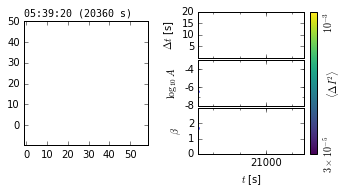

In [140]:
import matplotlib.gridspec as gridspec

outpath = r"U:\videos\vierpuntelf.avi"
basepath = r"U:\20151006 kleinere compressie"
measurement = r"20151012T024959"

if True: #def track_ex_plot(measurement, outpath):
    size_px = np.array([800,400])
    dpi = 160.
    size_in = np.float_(size_px)/dpi
    print size_in
    
    f = plt.figure(figsize=size_in)

    fourcc = cv2.VideoWriter_fourcc(*'IYUV')
    out = cv2.VideoWriter(outpath, fourcc, 25, tuple(size_px), True)    
    
    #try:
    #    rv = _track_ex_plot(measurement, f, out, size_px, dpi)
    #finally:
    #    out.release()
        
    #return rv




B0 = 916000
CD0 = 1144000

cst = 4.95e-5 # mm/pulse
cim = 60e-3 # mm/px 

deltaA_px2 = 58167 # px^2
deltaA_mm2 = deltaA_px2 * (cim)**2

t,frameno,Bpos,CDpos = np.loadtxt(os.path.join(basepath, measurement, 'position.csv')).T

A_pl2 = (B0+Bpos) * (CD0+CDpos)
A_mm2 = A_pl2 * (cst)**2

print "A at t=0: %.1f mm2" % (A_mm2[0])
print "deltaA at t=0: %.1f mm2" % (deltaA_mm2)

Aj_mm2 = A_mm2[0] - deltaA_mm2
Afoam_mm2 = Aj_mm2 * 0.842

print "Aj: %.1f mm2" % Aj_mm2
print "Afoam: %.1f mm2" % Afoam_mm2

print "Phi at t=0: %.2f" % (Afoam_mm2 / A_mm2[0])

phi = Afoam_mm2 / A_mm2

vardata = np.load(os.path.join(basepath, 'vardt', measurement, "alldt.npy")) / (200*200)
fitdata = np.load(os.path.join(basepath, 'vardt', measurement, "power_fit.npy"))
A = fitdata[:,0] / (200*200)
beta = fitdata[:,1]

import matplotlib
norm = matplotlib.colors.LogNorm(vmin=3e-5, vmax=1e-3)
cmap = plt.get_cmap('viridis')

if True: #def _track_ex_plot(measurement, f, out, size_px, dpi):
    impath = os.path.join(basepath, measurement, '%05i.png')
    poscsv = os.path.join(basepath, measurement, 'position.csv')
    croppath = os.path.join(basepath, 'crop', measurement, '%05i.npy')
    
    total_frames = len(glob.glob(os.path.join(basepath, measurement, "*.png")))
    vardata = vardata[:,:total_frames/2]
    A = A[:total_frames/2]
    beta = beta[:total_frames/2]
    
    n_frames = np.int(total_frames / 2 / 10) # alleen eerste helft is relevant
    skip = 10

    imgdata = StringIO.StringIO()

    t = f.text(0.12,0.99,"00:00:00",va='top',ha='left', fontdict=dict(family='monospace'))
    
    gs = gridspec.GridSpec(3, 2)
    ax1 = plt.subplot(gs[:,0], aspect='equal')
    
    ax_var = plt.subplot(gs[0,1])
    #ax_vdt = plt.subplot(gs[1,1])
    ax_A = plt.subplot(gs[1,1])
    ax_beta = plt.subplot(gs[2,1])

    ax_var.set_ylabel(r"$\Delta t$ [s]")
    ax_var.set_xticklabels([])
    ax_var.set_ylim(0,20)
    ax_var.set_yticks([5,10,15,20])
    m = ax_var.imshow(
        vardata,
        origin='lower',
        aspect='auto',
        interpolation='nearest',
        norm=norm,
        cmap=cmap
    )
    
    #ax_vdt.set_ylabel(r"$\langle \Delta I^2 \rangle$" + "\n" + r"$[\times 10^{-3}]$")
    #ax_vdt.set_xticklabels([])
    #ax_vdt.set_ylim(0, 4e-3)
    #ax_vdt.set_yticks([1e-3,2e-3,3e-3])
    #ax_vdt.set_yticklabels([1,2,3])
    
    ax_A.set_ylabel(r'$\log_{10}\, A$')
    ax_A.set_xticklabels([])
    ax_A.set_yscale('log')
    ax_A.set_ylim(1e-8, 1e-3)
    ax_A.set_yticks([1e-8,1e-6,1e-4])
    ax_A.set_yticklabels([-8, -6, -4])
    ax_A.set_yticks([1e-7,1e-6,1e-4,1e-3], minor=True)
    ax_A.plot(A)
       
    ax_beta.set_ylabel(r'$\beta$')
    ax_beta.set_xlabel(r'$t$ [s]')
    ax_beta.set_ylim(0,3)
    ax_beta.set_yticks([0,1,2])
    ax_beta.plot(beta)

    ax_var.set_xticks(np.arange(0,total_frames,250), minor=True)
    ax_A.set_xticks(np.arange(0,total_frames,250), minor=True)
    ax_beta.set_xticks(np.arange(0,total_frames,250), minor=True)
    ax_var.set_xticks(np.arange(0,total_frames,1000))
    ax_A.set_xticks(np.arange(0,total_frames,1000))
    ax_beta.set_xticks(np.arange(0,total_frames,1000))

    plt.subplots_adjust(left=0.12, top=0.97, right=0.95, bottom=0.18, hspace=0.05, wspace=0.4)
    
    cb = plt.colorbar(m, ax=[ax_var, ax_A, ax_beta], fraction=0.1)    
    cb.set_label(r'$\langle\Delta I^2\rangle$', labelpad=-10)
    cb.set_ticks([3e-5, 1e-3])
    cb.set_ticklabels([r"$3\times 10^{-5}$", r"$10^{-3}$"])
    plt.setp(cb.ax.get_ymajorticklabels(), rotation=90)
    cb.ax.get_ymajorticklabels()[1].set_va('top')
   
    #vlines = [ax_var.axvline(0), ax_A.axvline(0), ax_beta.axvline(0)]

    for i in range(0, (n_frames+1)*skip, skip):
        ax_var.set_xlim(i, i+1000)
        ax_A.set_xlim(i, i+1000)
        ax_beta.set_xlim(i, i+1000)
        
        # [a.set_data(([i,i],[0,1])) for a in vlines]
        
        ax1.set_xlabel(r"$x$ [mm]")
        ax1.set_ylabel(r"$y$ [mm]")
        
        #ax1.axis((-1.1398618349290994,
        # 46.854320688401401,
        # -5.3993455338746816,
        # 42.594836989455821))
        #ax2.axis((0,1,0,1))
        
        cur = crop(plt.imread(impath % i))
        curac = np.load(croppath % i)
        
        ftime = time.strftime("%H:%M:%S", time.gmtime(i)) + " (%i s)" % i
        t.set_text(ftime)

        ax1.imshow(cur, cmap='gray', vmin=0.1, vmax=0.8, extent=extent, origin='lower')
        
        ax1.text(0.01,0.01,r"$\phi=%.2f$" % phi[i],
                 transform=ax1.transAxes,
                 ha='left',va='bottom',color='white',
                bbox=dict(facecolor='black', pad=0),
        )
        #print ax1.axis()
        
        ##plt.savefig('c:/users/deen/dropbox/test.png', dpi=dpi)
        #break  
        f.savefig(imgdata, format='raw', dpi=dpi)
        imgdata.seek(0)
        data = np.fromstring(imgdata.buf, dtype='uint8').reshape(list(size_px[::-1]) + [4])[:,:,:3][:,:,::-1]
        out.write(data)
        
        ax1.cla()
        
out.release()

In [168]:
crop = lambda x: x[1000:200:-1,128:928]

x0 = 164
offset_x = x0-128
y0 = 956
offset_y = 1000-y0
px_per_tick = 0.000785
px_per_mm = px_per_tick / 4.95e-5 # px/tick, mm/tick

lx = 800 / px_per_mm
offset_x = - offset_x / px_per_mm
extent_x = [offset_x, offset_x + lx]

ly = 800 / px_per_mm
offset_y = - offset_y / px_per_mm
extent_y = [offset_y, offset_y + ly]

extent = extent_x + extent_y

import matplotlib.gridspec as gridspec

basepath = r"U:\20150907 3e-5"

def track_vierpuntveertien(measurement, outpath):
    size_px = np.array([800,400])
    dpi = 160.
    size_in = np.float_(size_px)/dpi
    print size_in
    
    f = plt.figure(figsize=size_in)

    fourcc = cv2.VideoWriter_fourcc(*'IYUV')
    out = cv2.VideoWriter(outpath, fourcc, 25, tuple(size_px), True)    
    
    try:
        rv = _track_ex_plot(measurement, f, out, size_px, dpi)
    finally:
        out.release()
        
    #return rv

def _track_ex_plot(measurement, f, out, size_px, dpi):
    import matplotlib
    norm = matplotlib.colors.LogNorm(vmin=3e-5, vmax=1e-3)
    cmap = plt.get_cmap('viridis')
    
    impath = os.path.join(basepath, measurement, '%05i.png')
    poscsv = os.path.join(basepath, measurement, 'position.csv')
    croppath = os.path.join(basepath, 'crop', measurement, '%05i.npy')
    
    vardata = np.load(os.path.join(basepath, 'vardt', measurement, "metingen.npz"))['variances'] / (200*200)
    fitdata = np.load(os.path.join(basepath, 'vardt', measurement, "power_fit.npy"))
    A = fitdata[:,0] / (200*200)
    beta = fitdata[:,1]
    
    n_frames = 1300
    skip = 10

    imgdata = StringIO.StringIO()

    t = f.text(0.12,0.99,"00:00:00",va='top',ha='left', fontdict=dict(family='monospace'))
    
    gs = gridspec.GridSpec(3, 2)
    ax1 = plt.subplot(gs[:,0], aspect='equal')
    
    ax_var = plt.subplot(gs[0,1])
    #ax_vdt = plt.subplot(gs[1,1])
    ax_A = plt.subplot(gs[1,1])
    ax_beta = plt.subplot(gs[2,1])

    ax_var.set_ylabel(r"$\Delta t$ [s]")
    ax_var.set_xticklabels([])
    ax_var.set_ylim(0,20)
    ax_var.set_yticks([5,10,15,20])
    m = ax_var.imshow(
        vardata,
        origin='lower',
        aspect='auto',
        interpolation='nearest',
        norm=norm,
        cmap=cmap
    )
    
    #ax_vdt.set_ylabel(r"$\langle \Delta I^2 \rangle$" + "\n" + r"$[\times 10^{-3}]$")
    #ax_vdt.set_xticklabels([])
    #ax_vdt.set_ylim(0, 4e-3)
    #ax_vdt.set_yticks([1e-3,2e-3,3e-3])
    #ax_vdt.set_yticklabels([1,2,3])
    
    ax_A.set_ylabel(r'$\log_{10}\, A$')
    ax_A.set_xticklabels([])
    ax_A.set_yscale('log')
    ax_A.set_ylim(1e-8, 1e-3)
    ax_A.set_yticks([1e-8,1e-6,1e-4])
    ax_A.set_yticklabels([-8, -6, -4])
    ax_A.set_yticks([1e-7,1e-6,1e-4,1e-3], minor=True)
    ax_A.plot(A)
       
    ax_beta.set_ylabel(r'$\beta$')
    ax_beta.set_xlabel(r'$t$ [s]')
    ax_beta.set_ylim(0,3)
    ax_beta.set_yticks([0,1,2])
    ax_beta.plot(beta)

    ax_var.set_xticks(np.arange(0,total_frames,250), minor=True)
    ax_A.set_xticks(np.arange(0,total_frames,250), minor=True)
    ax_beta.set_xticks(np.arange(0,total_frames,250), minor=True)
    ax_var.set_xticks(np.arange(0,total_frames,1000))
    ax_A.set_xticks(np.arange(0,total_frames,1000))
    ax_beta.set_xticks(np.arange(0,total_frames,1000))

    plt.subplots_adjust(left=0.12, top=0.97, right=0.95, bottom=0.18, hspace=0.05, wspace=0.4)
    
    cb = plt.colorbar(m, ax=[ax_var, ax_A, ax_beta], fraction=0.1)    
    cb.set_label(r'$\langle\Delta I^2\rangle$', labelpad=-10)
    cb.set_ticks([3e-5, 1e-3])
    cb.set_ticklabels([r"$3\times 10^{-5}$", r"$10^{-3}$"])
    plt.setp(cb.ax.get_ymajorticklabels(), rotation=90)
    cb.ax.get_ymajorticklabels()[1].set_va('top')
   
    #vlines = [ax_var.axvline(0), ax_A.axvline(0), ax_beta.axvline(0)]

    for i in range(0, (n_frames+1)*skip, skip):
        ax_var.set_xlim(i, i+1000)
        ax_A.set_xlim(i, i+1000)
        ax_beta.set_xlim(i, i+1000)
        
        # [a.set_data(([i,i],[0,1])) for a in vlines]
        
        ax1.set_xlabel(r"$x$ [mm]")
        ax1.set_ylabel(r"$y$ [mm]")
        
        #ax1.axis((-1.1398618349290994,
        # 46.854320688401401,
        # -5.3993455338746816,
        # 42.594836989455821))
        #ax2.axis((0,1,0,1))
        
        cur = crop(plt.imread(impath % i))
        curac = np.load(croppath % i)
        
        ftime = time.strftime("%H:%M:%S", time.gmtime(i)) + " (%i s)" % i
        t.set_text(ftime)

        ax1.imshow(cur, cmap='gray', vmin=0.01, vmax=0.15, extent=extent, origin='lower')
        
        f.savefig(imgdata, format='raw', dpi=dpi)
        imgdata.seek(0)
        data = np.fromstring(imgdata.buf, dtype='uint8').reshape(list(size_px[::-1]) + [4])[:,:,:3][:,:,::-1]
        out.write(data)
        
        ax1.cla()
        
out.release()

In [172]:
m = np.random.rand(10,10)
print m

m[2,[2,4,5]]

[[ 0.09816454  0.53405421  0.13908185  0.34705419  0.43051844  0.32648541
   0.19230409  0.96500228  0.5143888   0.22383111]
 [ 0.56528526  0.99226645  0.67024025  0.87055463  0.9087186   0.9959438
   0.62751443  0.55398108  0.21461402  0.88363218]
 [ 0.49456465  0.888581    0.66825419  0.53191594  0.06090968  0.07539048
   0.75893509  0.98625752  0.41679172  0.68517962]
 [ 0.27677692  0.77532395  0.40237486  0.96918624  0.39356655  0.98089233
   0.92242198  0.01881502  0.11580677  0.89037086]
 [ 0.69766277  0.34242477  0.40819769  0.45654804  0.33211318  0.86562775
   0.87052863  0.86483388  0.22412295  0.67278983]
 [ 0.05758066  0.68266726  0.76724652  0.76897619  0.64537633  0.02284215
   0.22161648  0.2824435   0.75893294  0.33105522]
 [ 0.63448615  0.24718568  0.96985133  0.06194145  0.18445823  0.85440389
   0.37809863  0.11107787  0.1908837   0.4318765 ]
 [ 0.05883037  0.59502285  0.35388853  0.05666917  0.95584471  0.74227765
   0.54237245  0.65007668  0.42230354  0.00896854]
 

array([ 0.66825419,  0.06090968,  0.07539048])

[ 5.   2.5]


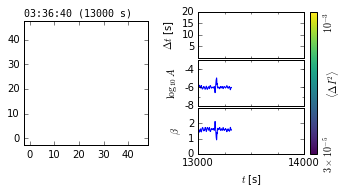

In [169]:
outpath = r"U:\videos\vierpuntveertien-085.avi"
measurement = r"20150907T204511~gdot3.00000E-5~A520000000000.00000"
track_vierpuntveertien(measurement, outpath)

[ 5.   2.5]


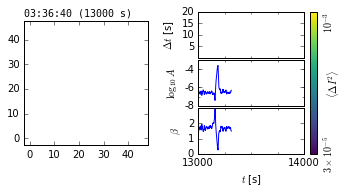

In [170]:
outpath = r"U:\videos\vierpuntveertien-150.avi"
measurement = r"20150907T160911~gdot3.00000E-5~A520000000000.00000"
track_vierpuntveertien(measurement, outpath)

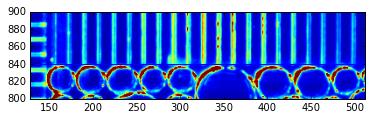

In [49]:
# finally, fig 4.14 (x2)

basepath = r"U:\20150907 3e-5"
measurements = 
{0.9: r"20150907T204511~gdot3.00000E-5~A520000000000.00000",
 1.5: r"20150907T160911~gdot3.00000E-5~A520000000000.00000",
}

